In [6]:

from scipy.io import mmread
import numpy as np

In [2]:
mm10 = mmread('results/test1/MATRIX_OUTPUT_merged_peaks_QCed_cells.mtx')
mm10

<287561x2358 sparse matrix of type '<class 'numpy.int64'>'
	with 2562664 stored elements in COOrdinate format>

In [3]:
ambiguous = mmread('results/test2/MATRIX_OUTPUT_merged_peaks_QCed_cells.mtx')
ambiguous

<287561x2358 sparse matrix of type '<class 'numpy.int64'>'
	with 3931735 stored elements in COOrdinate format>

In [4]:
CAST = mmread('results/test/MATRIX_OUTPUT_merged_peaks_QCed_cells.mtx')
CAST

<287561x2358 sparse matrix of type '<class 'numpy.int64'>'
	with 1279834 stored elements in COOrdinate format>

In [7]:
np.sum((mm10.data))

4060806

In [9]:
np.sum((CAST.data))

1755761

In [10]:
np.sum((ambiguous.data))

6566471

In [5]:
bin_mm10 = mm10>0

In [6]:
print(bin_mm10[1:3])

  (0, 94)	True
  (0, 379)	True
  (0, 406)	True
  (0, 1191)	True
  (0, 1560)	True
  (1, 94)	True
  (1, 234)	True
  (1, 407)	True
  (1, 634)	True
  (1, 1191)	True
  (1, 1504)	True
  (1, 1542)	True
  (1, 1546)	True
  (1, 1560)	True
  (1, 1937)	True
  (1, 2096)	True
  (1, 2136)	True
  (1, 2184)	True
  (1, 2187)	True


In [7]:
bin_CAST = CAST>0

In [8]:
Y= 4*bin_CAST + 2*bin_mm10

In [9]:
Y

<287561x2358 sparse matrix of type '<class 'numpy.int64'>'
	with 3763569 stored elements in Compressed Sparse Row format>

In [32]:
2562664+1279834

3842498

In [10]:
bin_ambiguous = ambiguous > 0

In [11]:
Y= 4*bin_CAST + 2*bin_mm10 + bin_ambiguous
Y

<287561x2358 sparse matrix of type '<class 'numpy.int64'>'
	with 7341969 stored elements in Compressed Sparse Row format>

In [71]:
287561*2358

678068838

In [40]:
print("(0,0,0):")
287561*2358-7341969


(0,0,0):


670726869

In [39]:
print("Sparsity")

print(7341969/287561/2358)


0.010827763478492135
Sparsity


In [12]:
print(Y[1])

  (0, 94)	2
  (0, 127)	1
  (0, 379)	2
  (0, 406)	2
  (0, 490)	1
  (0, 637)	1
  (0, 1143)	1
  (0, 1191)	2
  (0, 1546)	1
  (0, 1560)	2
  (0, 2021)	1
  (0, 2120)	1
  (0, 2271)	1


In [45]:
print(Y[1:10].data)

[2 1 2 2 1 1 1 2 1 2 1 1 1 1 2 2 1 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 4 4 1 4
 4 4 1 1 2 1 2 1 4 1 1 1 2 2 1 1 1 1 2 4 1 1 2 1 1 2 1 1 2 4 2 4 2 2 2 1 2
 2 2 1 1 2 2 2 2 1 2 1 1 1 1 1 2 2 4 4 1 1 1 4 2 4 4 1 4 1 1 1 2]


In [13]:
cts = Y.data

In [14]:
import pandas as pd


In [15]:
df = pd.Series(cts)

In [16]:
df.value_counts()

1    3578400
2    2241258
4    1118125
3     242477
5      82780
6      50851
7      28078
dtype: int64

In [17]:
table= df.value_counts()
print(table)

1    3578400
2    2241258
4    1118125
3     242477
5      82780
6      50851
7      28078
dtype: int64


In [18]:
for row in table.index:
    print(row, end = " ")

1 2 4 3 5 6 7 

[1, 2, 4, 3, 5, 6, 7]


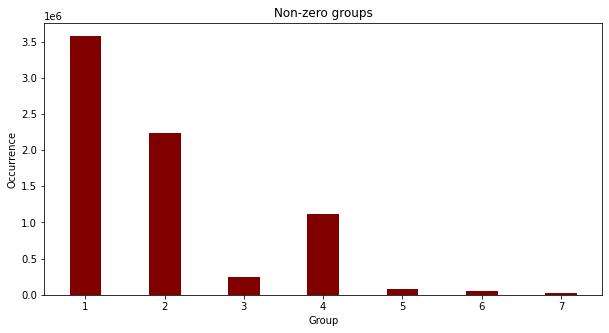

In [19]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
# data = {'C':20, 'C++':15, 'Java':30,
#         'Python':35}
#courses = list(data.keys())
#values = list(data.values())

group = list(table.index)
print(group)
#group = ["",]
values = list(table.values)
    
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(group, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Group")
plt.ylabel("Occurrence")
plt.title("Non-zero groups")
plt.show()

<AxesSubplot:>

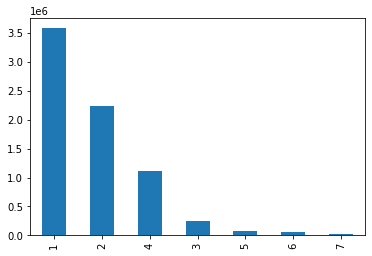

In [20]:
table.plot.bar()

In [68]:
print("groups precentatge:")
print(table.values/287561/2358)

groups precentatge:
[5.27734029e-03 3.30535467e-03 1.64898449e-03 3.57599386e-04
 1.22082000e-04 7.49938607e-05 4.14087751e-05]


In [69]:
print("groups precentatge:")
print(table.values/np.sum(table.values))

groups precentatge:
[0.48738969 0.30526661 0.15229225 0.03302615 0.0112749  0.00692607
 0.00382431]


In [22]:
np.sum(mm10.data)

4060806

In [23]:
np.sum(CAST.data)

1755761